# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
import time
from scipy import stats
import seaborn as sns
sns.set()

# Reading the data

In [2]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv') 
data.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# Scaling the data

In [4]:
Min_max = preprocessing.MinMaxScaler(feature_range = (0,1))

cols = data.columns
data[cols] = Min_max.fit_transform(data[cols])

data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000,1.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117,1.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676,1.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235,1.0


# Removing Outliers

In [5]:
z_score = np.abs(stats.zscore(data))
threshold = 3
print(np.where(z_score > threshold))

(array([  1,   4,   9,  19,  28,  52,  52,  60,  64,  72, 103, 105, 109,
       131, 134, 171, 199, 217, 228, 296], dtype=int64), array([2, 8, 7, 8, 7, 2, 7, 2, 4, 2, 2, 6, 6, 7, 2, 2, 8, 7, 7, 6],
      dtype=int64))


In [6]:
data = data[(z_score < 3).all(axis=1)]
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,0.381320,0.435714,0.055336,0.417857,0.361147,0.360714,0.283331,0.087123,0.680714,0.653571,0.314286,0.457994,0.307143
std,0.214824,0.496738,0.068526,0.494089,0.173795,0.481068,0.103777,0.069185,0.112120,0.476684,0.465062,0.274675,0.462135
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.314286,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.000000,0.011674,0.000000,0.242424,0.000000,0.225058,0.044944,0.600000,0.000000,0.000000,0.249110,0.000000
50%,0.363636,0.000000,0.027622,0.000000,0.363636,0.000000,0.285974,0.067416,0.685714,1.000000,0.000000,0.411032,0.000000
75%,0.545455,1.000000,0.071319,1.000000,0.469697,1.000000,0.335677,0.101124,0.771429,1.000000,1.000000,0.716192,1.000000
max,1.000000,1.000000,0.353534,1.000000,0.772727,1.000000,0.627834,0.438202,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
X = data.iloc[:,:12].to_numpy()
y = data.iloc[:,12:].to_numpy()
y = np.ravel(y)
X1 = X
y1 = y

In [8]:
split_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = split_size, random_state = 64)

# 2 Best Classifiers

1. Naïve Bayes

In [9]:
nb = GaussianNB(var_smoothing = pow(10,-2))
start_time = time.time()
nb.fit(X_train, y_train)
elapsed_time = time.time() - start_time
print(f'{elapsed_time:.10f}s elapsed during training')

0.0056161880s elapsed during training


In [10]:
nb1 = GaussianNB(var_smoothing = pow(10,-2))
start_time = time.time()
nb1.fit(X_test, y_test)
elapsed_time = time.time() - start_time
print(f'{elapsed_time:.10f}s elapsed during testing')

0.0101788044s elapsed during testing


In [11]:
Predicted_values_for_NB = nb.predict(X_test)
# Predicted_values_for_NB

In [12]:
print("The training accuracy for split is: ",nb.score(X_train, y_train))
print("The testing accuracy for split is: ",nb.score(X_test, y_test))

The training accuracy for split is:  0.8316326530612245
The testing accuracy for split is:  0.8214285714285714


In [13]:
detailed_summary_for_NB = precision_recall_fscore_support(y_test, Predicted_values_for_NB)
print("The precision for the model is:",detailed_summary_for_NB[0])
print("The recall for the model is:",detailed_summary_for_NB[1])
print("The F-score for the model is:",detailed_summary_for_NB[2])

The precision for the model is: [0.86885246 0.69565217]
The recall for the model is: [0.88333333 0.66666667]
The F-score for the model is: [0.87603306 0.68085106]


In [14]:
accuracy_score(y_test, Predicted_values_for_NB)

0.8214285714285714

In [15]:
confusion_matrix(y_test, Predicted_values_for_NB)

array([[53,  7],
       [ 8, 16]], dtype=int64)

In [16]:
print(classification_report(y_test, Predicted_values_for_NB))

              precision    recall  f1-score   support

         0.0       0.87      0.88      0.88        60
         1.0       0.70      0.67      0.68        24

    accuracy                           0.82        84
   macro avg       0.78      0.77      0.78        84
weighted avg       0.82      0.82      0.82        84



2. SVC (Linear)

In [17]:
svc = LinearSVC(max_iter = 5000, dual = False)
start_time = time.time()
svc.fit(X_train, y_train)
elapsed_time = time.time() - start_time
print(f'{elapsed_time:.10f}s elapsed during training')

0.0059752464s elapsed during training


In [18]:
svc1 = LinearSVC(max_iter = 5000, dual = False)
start_time = time.time()
svc1.fit(X_test, y_test)
elapsed_time = time.time() - start_time
print(f'{elapsed_time:.10f}s elapsed during testing')

0.0029535294s elapsed during testing


In [19]:
Predicted_values_for_svc = svc.predict(X_test)
# Predicted_values_for_svc

In [20]:
print("The training accuracy for split is: ",svc.score(X_train, y_train))
print("The testing accuracy for split is: ",svc.score(X_test, y_test))

The training accuracy for split is:  0.8367346938775511
The testing accuracy for split is:  0.8333333333333334


In [21]:
detailed_summary_for_svc = precision_recall_fscore_support(y_test, Predicted_values_for_svc)
print("The precision for the model is:",detailed_summary_for_svc[0])
print("The recall for the model is:",detailed_summary_for_svc[1])
print("The F-score for the model is:",detailed_summary_for_svc[2])

The precision for the model is: [0.88333333 0.70833333]
The recall for the model is: [0.88333333 0.70833333]
The F-score for the model is: [0.88333333 0.70833333]


In [22]:
accuracy_score(y_test, Predicted_values_for_svc)

0.8333333333333334

In [23]:
confusion_matrix(y_test, Predicted_values_for_svc)

array([[53,  7],
       [ 7, 17]], dtype=int64)

In [24]:
print(classification_report(y_test, Predicted_values_for_svc))

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88        60
         1.0       0.71      0.71      0.71        24

    accuracy                           0.83        84
   macro avg       0.80      0.80      0.80        84
weighted avg       0.83      0.83      0.83        84



# Feature Selection

In [25]:
X_new1 = SelectKBest(chi2, k=7).fit_transform(X, y)

In [26]:
X_new_train, X_new_test, y_train, y_test = train_test_split(X_new1,y,test_size = split_size, random_state = 64)

1. Naïve Bayes

In [27]:
nb = GaussianNB(var_smoothing = pow(10,-2))
start_time = time.time()
nb.fit(X_new_train, y_train)
elapsed_time = time.time() - start_time
print(f'{elapsed_time:.10f}s elapsed during training')

0.0063247681s elapsed during training


In [28]:
nb1 = GaussianNB(var_smoothing = pow(10,-2))
start_time = time.time()
nb1.fit(X_new_test, y_test)
elapsed_time = time.time() - start_time
print(f'{elapsed_time:.10f}s elapsed during testing')

0.0034608841s elapsed during testing


In [29]:
Predicted_values_for_NB_new = nb.predict(X_new_test)
# Predicted_values_for_NB_new

In [30]:
print("The training accuracy for split is: ",nb.score(X_new_train, y_train))
print("The testing accuracy for split is: ",nb.score(X_new_test, y_test))

The training accuracy for split is:  0.8469387755102041
The testing accuracy for split is:  0.8333333333333334


In [31]:
detailed_summary_for_NB_new = precision_recall_fscore_support(y_test, Predicted_values_for_NB_new)
print("The precision for the model is:",detailed_summary_for_NB_new[0])
print("The recall for the model is:",detailed_summary_for_NB_new[1])
print("The F-score for the model is:",detailed_summary_for_NB_new[2])

The precision for the model is: [0.88333333 0.70833333]
The recall for the model is: [0.88333333 0.70833333]
The F-score for the model is: [0.88333333 0.70833333]


In [32]:
accuracy_score(y_test, Predicted_values_for_NB_new)

0.8333333333333334

In [33]:
confusion_matrix(y_test, Predicted_values_for_NB_new)

array([[53,  7],
       [ 7, 17]], dtype=int64)

In [34]:
print(classification_report(y_test, Predicted_values_for_NB_new))

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88        60
         1.0       0.71      0.71      0.71        24

    accuracy                           0.83        84
   macro avg       0.80      0.80      0.80        84
weighted avg       0.83      0.83      0.83        84



2. SVC (Linear)

In [35]:
svc = LinearSVC(max_iter = 5000, dual = False)
start_time = time.time()
svc.fit(X_new_train, y_train)
elapsed_time = time.time() - start_time
print(f'{elapsed_time:.10f}s elapsed during training')

0.0019962788s elapsed during training


In [36]:
svc1 = LinearSVC(max_iter = 5000, dual = False)
start_time = time.time()
svc1.fit(X_new_test, y_test)
elapsed_time = time.time() - start_time
print(f'{elapsed_time:.10f}s elapsed during testing')

0.0017344952s elapsed during testing


In [37]:
Predicted_values_for_svc_new = svc.predict(X_new_test)
# Predicted_values_for_svc_new

In [38]:
print("The training accuracy for split is: ",svc.score(X_new_train, y_train))
print("The testing accuracy for split is: ",svc.score(X_new_test, y_test))

The training accuracy for split is:  0.8418367346938775
The testing accuracy for split is:  0.8214285714285714


In [39]:
detailed_summary_for_svc_new = precision_recall_fscore_support(y_test, Predicted_values_for_svc_new)
print("The precision for the model is:",detailed_summary_for_svc_new[0])
print("The recall for the model is:",detailed_summary_for_svc_new[1])
print("The F-score for the model is:",detailed_summary_for_svc_new[2])

The precision for the model is: [0.88135593 0.68      ]
The recall for the model is: [0.86666667 0.70833333]
The F-score for the model is: [0.87394958 0.69387755]


In [40]:
accuracy_score(y_test, Predicted_values_for_svc_new)

0.8214285714285714

In [41]:
confusion_matrix(y_test, Predicted_values_for_svc_new)

array([[52,  8],
       [ 7, 17]], dtype=int64)

In [42]:
print(classification_report(y_test, Predicted_values_for_svc_new))

              precision    recall  f1-score   support

         0.0       0.88      0.87      0.87        60
         1.0       0.68      0.71      0.69        24

    accuracy                           0.82        84
   macro avg       0.78      0.79      0.78        84
weighted avg       0.82      0.82      0.82        84



# Principal Component Analysis

Text(1, 0.85, '70% cutoff')

<Figure size 720x432 with 0 Axes>

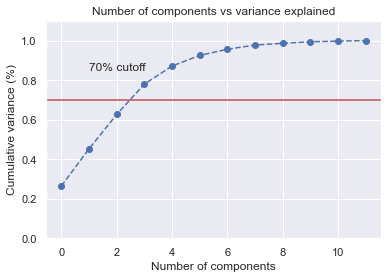

In [43]:
pca = PCA(n_components = 12)

pca.fit(X1)
plt.figure(figsize=(10,6))

fig, ax =plt.subplots()
x = np.arange(0,len(pca.explained_variance_ratio_), step = 1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0, 1.1)
plt.plot(x, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of components')
plt.ylabel('Cumulative variance (%)')
plt.title('Number of components vs variance explained')

plt.axhline(y=0.7, color='r', linestyle ='-')
plt.text(1, 0.85, '70% cutoff')

In [44]:
pca = PCA()
pca.fit(X1)
PCA(copy=True, iterated_power='auto', n_components=12, random_state=None,svd_solver='auto', tol=0.0, whiten=False) 
print(pca.explained_variance_ratio_) 

[0.26397642 0.18844866 0.17366738 0.15374351 0.09124263 0.05396445
 0.03105807 0.02137554 0.00877829 0.00765194 0.00330237 0.00279075]


In [45]:
print(pca.singular_values_) 

[9.97289047 8.42626289 8.0890516  7.61091507 5.86323595 4.50912607
 3.42078473 2.83789929 1.81862606 1.69794757 1.11545246 1.02541274]


In [46]:
np.cumsum(pca.explained_variance_ratio_)

array([0.26397642, 0.45242508, 0.62609246, 0.77983597, 0.87107859,
       0.92504305, 0.95610112, 0.97747666, 0.98625495, 0.99390689,
       0.99720925, 1.        ])

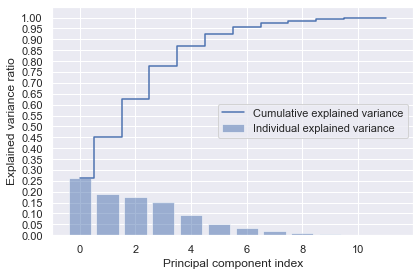

In [47]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.yticks(np.arange(0,1.05,0.05))
plt.tight_layout()
plt.show()

In [48]:
pca = PCA(n_components = 4)
pca.fit(X1)
X_new2 = pca.fit_transform(X1)
PCA(copy=True, iterated_power='auto', n_components=12, random_state=None,svd_solver='auto', tol=0.0, whiten=False) 
print(pca.explained_variance_ratio_) 

[0.26397642 0.18844866 0.17366738 0.15374351]


In [49]:
features_train, features_test, labels_train, labels_test = train_test_split(X_new2,y1,test_size = split_size, random_state = 64)

1. Naïve Bayes

In [50]:
nb = GaussianNB(var_smoothing = pow(10,-2))
start_time = time.time()
nb.fit(features_train,labels_train)
elapsed_time = time.time() - start_time
print(f'{elapsed_time:.10f}s elapsed during training')

0.0029945374s elapsed during training


In [51]:
nb1 = GaussianNB(var_smoothing = pow(10,-2))
start_time = time.time()
nb1.fit(features_test,labels_test)
elapsed_time = time.time() - start_time
print(f'{elapsed_time:.10f}s elapsed during testing')

0.0019946098s elapsed during testing


In [52]:
Predicted_values_for_NB_new1 = nb.predict(features_test)
# Predicted_values_for_NB_new1

In [53]:
print("The training accuracy for split is: ",nb.score(features_train,labels_train))
print("The testing accuracy for split is: ",nb.score(features_test,labels_test))

The training accuracy for split is:  0.673469387755102
The testing accuracy for split is:  0.7142857142857143


In [54]:
detailed_summary_for_NB_new1 = precision_recall_fscore_support(labels_test, Predicted_values_for_NB_new1)
print("The precision for the model is:",detailed_summary_for_NB_new1[0])
print("The recall for the model is:",detailed_summary_for_NB_new1[1])
print("The F-score for the model is:",detailed_summary_for_NB_new1[2])

The precision for the model is: [0.725 0.5  ]
The recall for the model is: [0.96666667 0.08333333]
The F-score for the model is: [0.82857143 0.14285714]


In [55]:
accuracy_score(labels_test, Predicted_values_for_NB_new1)

0.7142857142857143

In [56]:
confusion_matrix(labels_test, Predicted_values_for_NB_new1)

array([[58,  2],
       [22,  2]], dtype=int64)

In [57]:
print(classification_report(labels_test, Predicted_values_for_NB_new1))

              precision    recall  f1-score   support

         0.0       0.72      0.97      0.83        60
         1.0       0.50      0.08      0.14        24

    accuracy                           0.71        84
   macro avg       0.61      0.53      0.49        84
weighted avg       0.66      0.71      0.63        84



2. SVC (Linear)

In [58]:
svc = LinearSVC(max_iter = 5000, dual = False)
start_time = time.time()
svc.fit(features_train,labels_train)
elapsed_time = time.time() - start_time
print(f'{elapsed_time:.10f}s elapsed during training')

0.0019931793s elapsed during training


In [59]:
svc1 = LinearSVC(max_iter = 5000, dual = False)
start_time = time.time()
svc1.fit(features_test,labels_test)
elapsed_time = time.time() - start_time
print(f'{elapsed_time:.10f}s elapsed during testing')

0.0029921532s elapsed during testing


In [60]:
Predicted_values_for_svc_new1 = svc.predict(features_test)
#Predicted_values_for_svc_new1

In [61]:
print("The training accuracy for split is: ",svc.score(features_train,labels_train))
print("The testing accuracy for split is: ",svc.score(features_test,labels_test))

The training accuracy for split is:  0.6785714285714286
The testing accuracy for split is:  0.7142857142857143


In [62]:
detailed_summary_for_svc_new1 = precision_recall_fscore_support(labels_test, Predicted_values_for_svc_new1)
print("The precision for the model is:",detailed_summary_for_svc_new1[0])
print("The recall for the model is:",detailed_summary_for_svc_new1[1])
print("The F-score for the model is:",detailed_summary_for_svc_new1[2])

The precision for the model is: [0.71428571 0.        ]
The recall for the model is: [1. 0.]
The F-score for the model is: [0.83333333 0.        ]


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
accuracy_score(labels_test, Predicted_values_for_svc_new1)

0.7142857142857143

In [64]:
confusion_matrix(labels_test, Predicted_values_for_svc_new1)

array([[60,  0],
       [24,  0]], dtype=int64)

In [65]:
print(classification_report(labels_test, Predicted_values_for_svc_new1))

              precision    recall  f1-score   support

         0.0       0.71      1.00      0.83        60
         1.0       0.00      0.00      0.00        24

    accuracy                           0.71        84
   macro avg       0.36      0.50      0.42        84
weighted avg       0.51      0.71      0.60        84

